<h1>Data visualization</h1>

This Notebook focuses on visualizing the data we got so that it may be easier to understand them. In the long run it helps us solve different errors (like null entries) and make predictions about why certain Algorithms or Embeddings are not as useful as they seemed to be.

First we load the whole Data from the Database

In [17]:
import sqlite3
import pandas as pd

pd.set_option('display.max_colwidth', 200)

def df_from_database(database_path):
    con = sqlite3.connect(database_path)
    html_df = pd.read_sql_query("SELECT * FROM html", con)
    con.close()
    return html_df

df = df_from_database("html.sqlite")

df["url"] = ["https://www.th-nuernberg.de/" + file.replace("data/htmlfiles/file_","").replace(">", "/").replace(".html", "") for file in df["filename"]]

print(df.dtypes)

filename           object
title              object
text               object
tokens             object
word_embeddings    object
dtype: object


In [3]:
print(f"Wir haben insgesamt {len(df)} verschiedene Webseiten gescraped")
print("2 Beispiele der Daten sind")
print(df.sample(2))

Wir haben insgesamt 2433 verschiedene Webseiten gescraped
2 Beispiele der Daten sind
                                               filename  \
2200  data/htmlfiles/file_einrichtungen-gesamt>in-in...   
1528  data/htmlfiles/file_fakultaeten>efi>studium>ba...   

                                                  title  \
2200  Ausstattung der Standorte – Technische Hochsch...   
1528  Mechatronik / Feinwerktechnik (B. Eng.) – Tech...   

                                                   text  \
2200         Räumlichkeiten am Kesslerplatz (KA-Gebä...   
1528            Interessieren dich modernste Produkt...   

                                        word_embeddings  
2200  [0.0576619952917099, 0.4633079469203949, 0.039...  
1528  [0.30412495136260986, 0.6750208139419556, 0.13...  


Der Text auf diese Webseiten ist dabei im Schnitt 

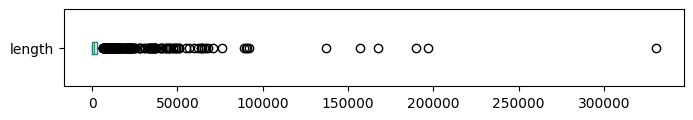

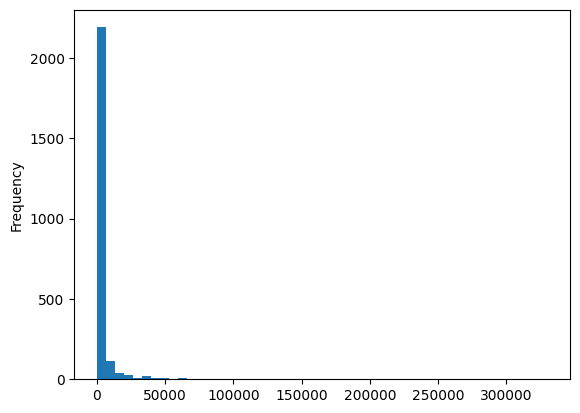

In [21]:
import matplotlib.pyplot as plt

df['length'] = df['text'].map(len)
df['length'].plot(kind='box', vert=False, figsize=(8, 1))
plt.show()
df['length'].plot(kind='hist', bins=50)
plt.show()

In [22]:
most_text = df.sort_values("length", ascending=False).head(10)
print(most_text["url"])

1767                                                                                              https://www.th-nuernberg.de/fakultaeten/bw/fakultaet/alumni/alumniportraits/
1520                                                                                             https://www.th-nuernberg.de/fakultaeten/bw/fakultaet/alumni/alumniinterviews/
2387                                                                                                    https://www.th-nuernberg.de/fakultaeten/amp/fakultaet/veranstaltungen/
943                                                                                         https://www.th-nuernberg.de/fakultaeten/bw/studium/bachelor-betriebswirtschaft-ba/
837                                                                              https://www.th-nuernberg.de/fakultaeten/bw/fakultaet/alumni/auszeichnungen-preistraegerinnen/
2063                                                               https://www.th-nuernberg.de/forschung-innovation/beratung-

TODO: links zu webseiten im Dataframe speichern
Die Seite mit dem meißten Inhalt (https://www.th-nuernberg.de/fakultaeten/bw/fakultaet/alumni/alumniportraits/) ist tatsächlich eine sehr Informative Webseite, bei der Porträts über ehemalige Absolvent*innen der Fakultät BWL zu sehen sind.

Webseiten mit wenigstem Text (immernoch sinnvolle Inhalte)

In [24]:
least_text = df.sort_values("length", ascending=True).head(10)
print(least_text["url"])

0                                                                                                      https://www.th-nuernberg.de/pressemitteilungen/aktuelle-meldung/News/2020/01/
629                                                                                    https://www.th-nuernberg.de/veranstaltung/8646-studieninfotage-das-orientierungsstudium-mint/
1605                                              https://www.th-nuernberg.de/fileadmin/zentrale-einrichtungen/hse/qualit%C3%A4tsmanagement/Bilder_QM/PLK_170616_qm2_V5_LB_bj_V2.jpg
1604                                   https://www.th-nuernberg.de/fileadmin/zentrale-einrichtungen/hse/qualit%C3%A4tsmanagement/SysAkk/AkkBericht_THN_BW_B-IBT_RA_2020_20200717.pdf
1603                                                                                                       https://www.th-nuernberg.de/veranstaltung/8539-16-nuernberger-bauseminar/
1602                          https://www.th-nuernberg.de/veranstaltung/8651-studieninfotage-in

Wordcloud mit allen Worten
TODO: sortiere häufigdte Wörter aus, lemmatisieren, deutsch-englisch

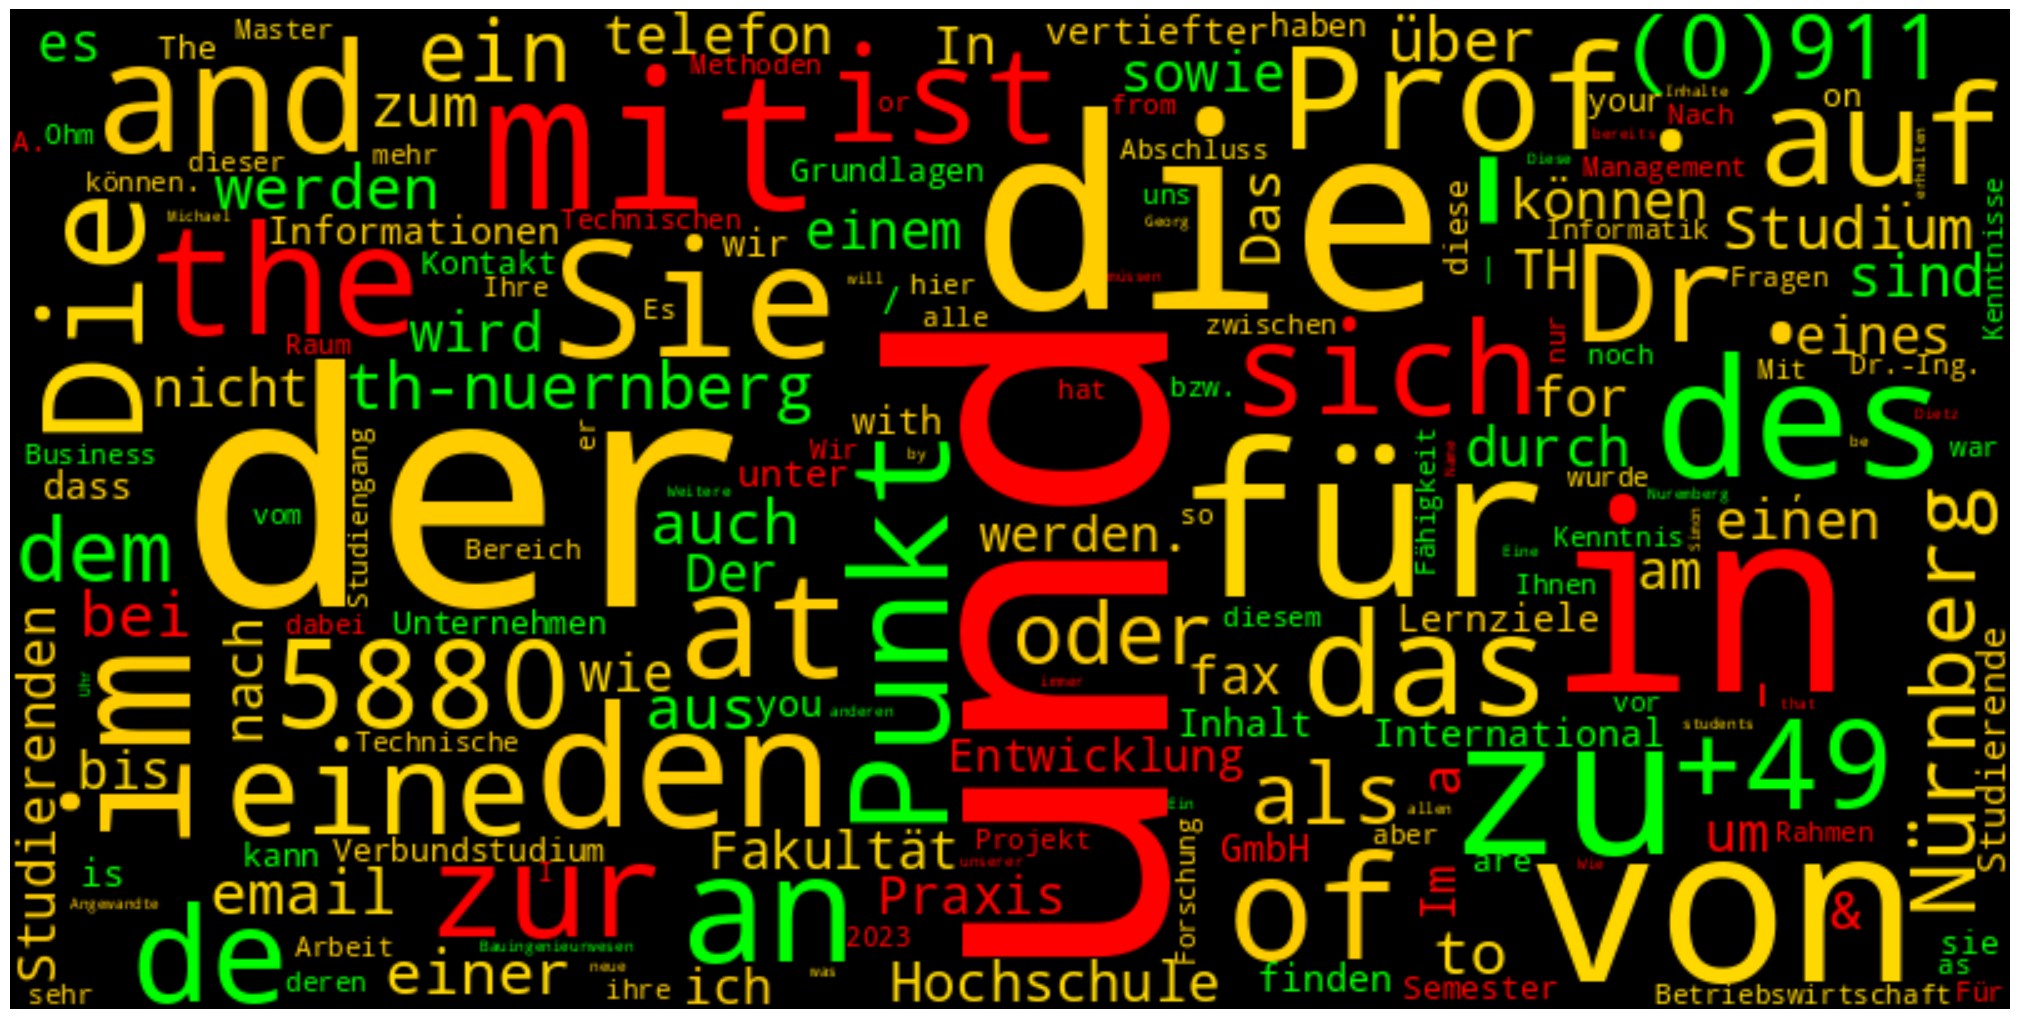

In [26]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap
from collections import Counter


def txa_wordcloud(list_of_words, bg_color="black", mask=None):
    # Define custom colors for the color map
    colors = ["#FF0000", "#FFCD00", "#FFD800", "#00FF00"]

    # Create a custom color map using ListedColormap
    colormap = ListedColormap(colors)

    wc = WordCloud(width=800, height=400, background_color=bg_color, colormap=colormap, max_words=200, mask=mask) 
    wc.generate_from_frequencies(Counter(list_of_words))

    # Plot
    fig = plt.figure(figsize=(20, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

whole_text = " ".join(df["text"])
whole_text = whole_text.replace("\n", "")
whole_text_list = whole_text.split(" ")
txa_wordcloud(whole_text_list)

TODO: Anzahl an Seiten mit nicht-html content (xml, jpg, pdf ... )

In [28]:
xml_text = df.loc[ "xml" not in df["filename"] ]
print(least_text["url"])

KeyError: 'True: boolean label can not be used without a boolean index'